# Barcelona dataset analysis

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## General analysis of the population

In [3]:
population = pd.read_csv("input/population.csv")

In [4]:
population.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [5]:
years = list(set(population.Year))

In [6]:
years.sort()

### Population Development over Time

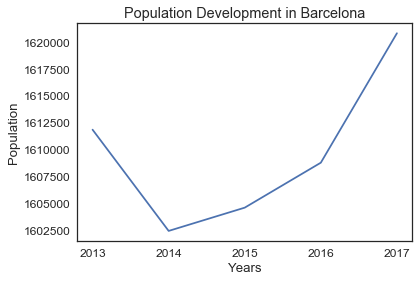

In [7]:
sns.set_style("white")
sns.set_context("notebook",font_scale=1.2)
sns.set_palette("deep")

plt.plot(years,[sum(population[population.Year==x].Number) for x in years])
ax = plt.subplot()
plt.xlabel("Years")
plt.ylabel("Population")
plt.title("Population Development in Barcelona")
ax.set_xticks(years)

plt.show()

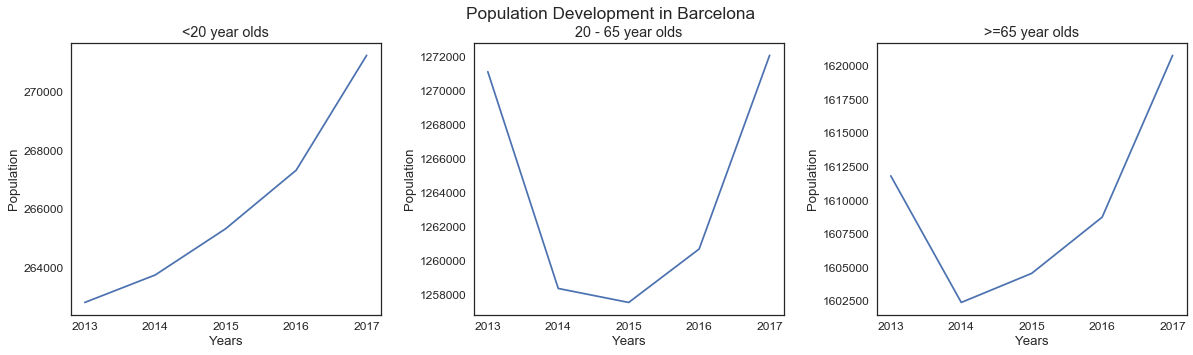

In [8]:
population.Age[population.Age==">=95"] = "-95"
#split population in 3 parts: younger than 18; between 18 and 65; older than 65
age_cutoffs=[20,65,200]
fig = plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.3)
plt.suptitle("Population Development in Barcelona")
titles = ["<20 year olds","20 - 65 year olds",">=65 year olds"]
for ind,age_cutoff in enumerate(age_cutoffs):
    ax = plt.subplot(1,3,ind+1)
    plt.plot(years,[sum(population[population.Year==x][[(int(a.split("-")[-1]) < age_cutoff) for a in population[population.Year==x].Age]].Number) for x in years])
    plt.xlabel("Years")
    plt.ylabel("Population")
    plt.title(titles[ind])
    ax.set_xticks(years)
population.Age[population.Age=="-95"] = ">=95"

### Population Distribution by District and Neighborhood

Text(0.5,1,'Population Distribution by District')

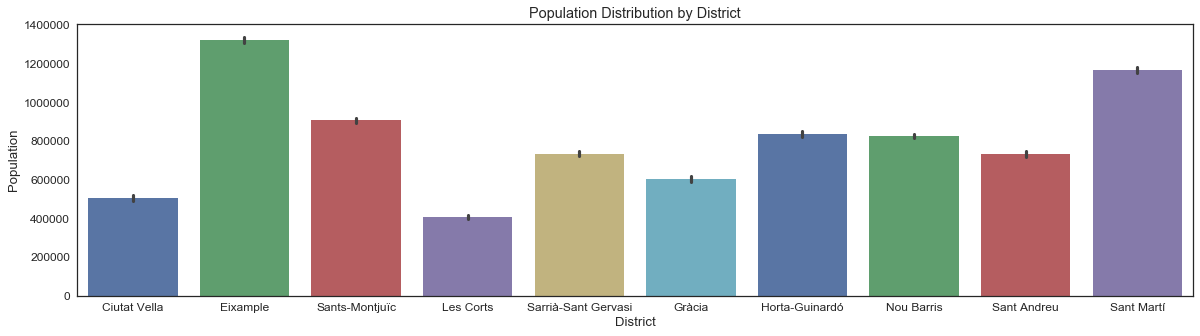

In [9]:
plt.figure(figsize=(20,5))
sns.set_palette("deep",n_colors=len(set(population["District.Name"])))
by_neighborhood = sns.barplot(data=population,x="District.Name",y="Number",estimator=sum)
plt.ylabel("Population")
plt.xlabel("District")
plt.title("Population Distribution by District")

Text(0.5,1,'Population Distribution by Neighborhood')

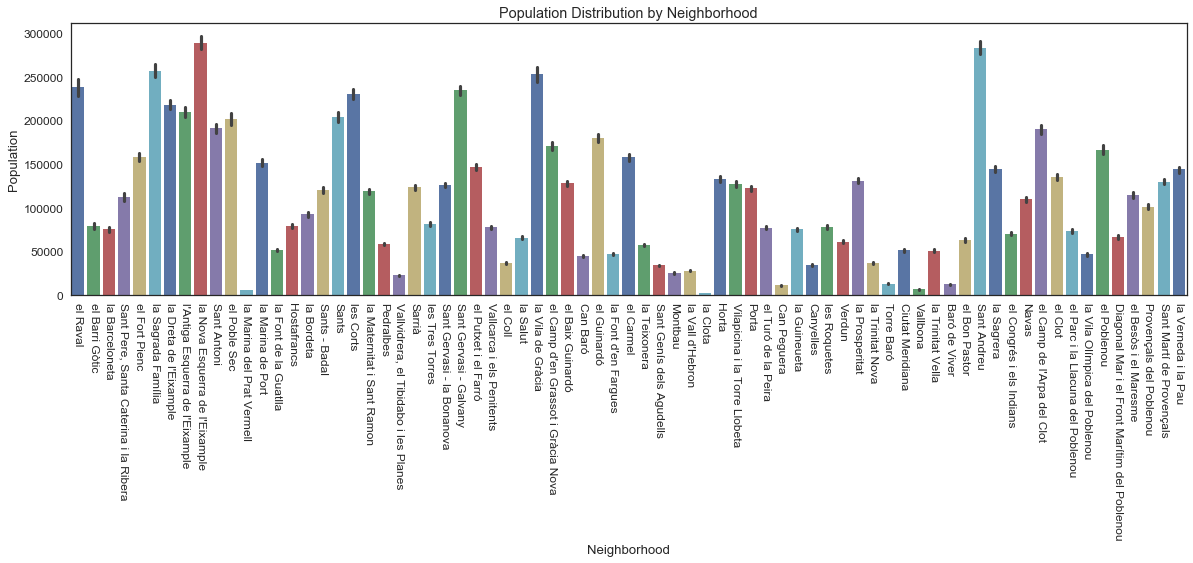

In [10]:
plt.figure(figsize=(20,5))
sns.set_palette("deep",n_colors=len(set(population["Neighborhood.Name"])))
by_neighborhood = sns.barplot(data=population,x="Neighborhood.Name",y="Number",estimator=sum)
for item in by_neighborhood.get_xticklabels():
    item.set_rotation(-90)
plt.ylabel("Population")
plt.xlabel("Neighborhood")
plt.title("Population Distribution by Neighborhood")

### Population Distribution by Gender

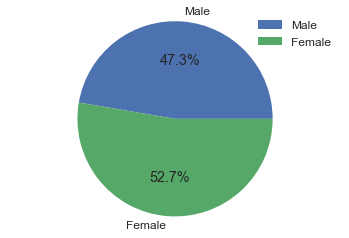

In [11]:
plt.pie([sum(population.Number[population.Gender == x]) for x in set(population.Gender)],labels=list(set(population.Gender)),autopct="%1.1f%%")
plt.axis('equal')
plt.legend()

In [12]:
female_pop_by_year = [sum(population.Number[population.Gender=="Female"][population.Year==year]) for year in years]
male_pop_by_year = [sum(population.Number[population.Gender=="Male"][population.Year==year]) for year in years]

Text(0.5,1,'Development of Population over Years')

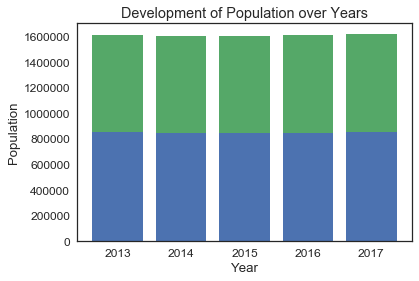

In [13]:
plt.bar(years,female_pop_by_year)
plt.bar(years,male_pop_by_year,bottom=female_pop_by_year)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Development of Population over Years")

#### Gender Distribution by District

In [28]:
district_names = list(set(population["District.Name"]))

Unique districts

In [44]:
district_names

['Ciutat Vella',
 'Les Corts',
 'Eixample',
 'Sants-Montjuïc',
 'Sarrià-Sant Gervasi',
 'Nou Barris',
 'Sant Andreu',
 'Gràcia',
 'Horta-Guinardó',
 'Sant Martí']

In [45]:
female_pop_by_dist = [sum(population.Number[population.Gender=="Female"][population["District.Name"]==dis]) for dis in district_names]
male_pop_by_dist = [sum(population.Number[population.Gender=="Male"][population["District.Name"]==dis]) for dis in district_names]

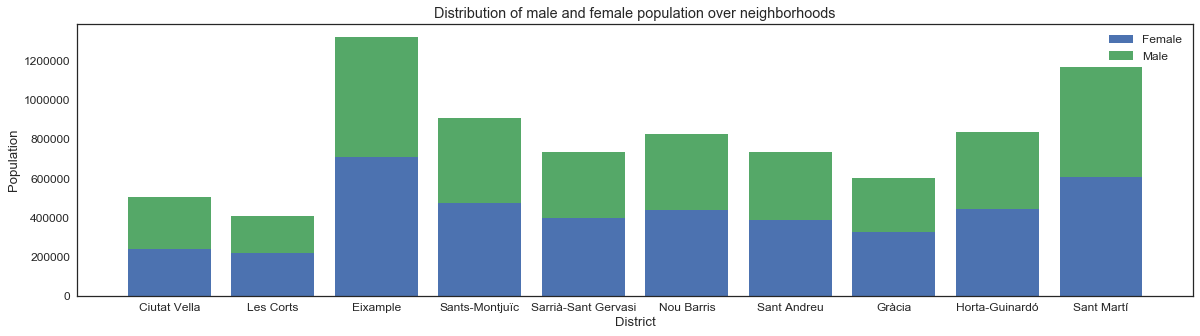

In [46]:
plt.figure(figsize=(20,5))
plt.bar(district_names,female_pop_by_dist)
plt.bar(district_names,male_pop_by_dist,bottom=female_pop_by_dist)
plt.xlabel("District")
plt.ylabel("Population")
plt.title("Distribution of male and female population over neighborhoods")
plt.legend(["Female","Male"])

#### Gender Distribution by Age

In [47]:
age_ordered = [
 '0-4',
 '5-9',
 '10-14',
 '15-19',
 '20-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-69',
 '70-74',
 '75-79',
 '80-84',
 '85-89',
 '90-94',
 '>=95']

In [48]:
female_pop_by_age = [sum(population.Number[population.Gender=="Female"][population.Age==age]) for age in age_ordered]
male_pop_by_age = [sum(population.Number[population.Gender=="Male"][population.Age==age]) for age in age_ordered]

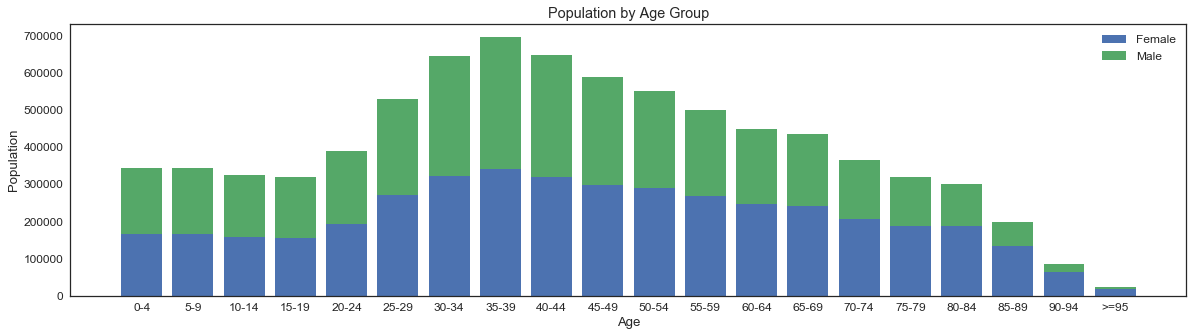

In [49]:
plt.figure(figsize=(20,5))
plt.bar(age_ordered,female_pop_by_age)
plt.bar(age_ordered,male_pop_by_age,bottom=female_pop_by_age)
plt.xlabel("Age")
plt.ylabel("Population")
plt.title("Population by Age Group")
plt.legend(["Female","Male"])

## Analysis of Immigration

In [50]:
immigrants = pd.read_csv("input/immigrants_by_nationality.csv")

In [51]:
immigrants.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Nationality,Number
0,2017,1,Ciutat Vella,1,el Raval,Spain,1109
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Spain,482
2,2017,1,Ciutat Vella,3,la Barceloneta,Spain,414
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Spain,537
4,2017,2,Eixample,5,el Fort Pienc,Spain,663


In [52]:
unique_years = list(set(immigrants["Year"]))
immigration_per_year = [sum(immigrants["Number"][immigrants["Year"]==year]) for year in unique_years]

In [53]:
unique_years.sort()

In [54]:
origin_countries = list(pd.unique(immigrants["Nationality"]))

In [55]:
immigration_numbers = [sum(immigrants[immigrants["Nationality"]==country]["Number"]) for country in origin_countries]

In [56]:
origin_countries = [x for _,x in sorted(zip(immigration_numbers,origin_countries),reverse=True)]

In [57]:
immigration_numbers.sort(reverse=True)

In [58]:
sum_of_rest = sum(immigration_numbers[8:])

### Immigrant Distribution among countries of origin

Distribution of immigrants among the 8 most common countries and the rest of the world

(-1.100639216316523,
 1.1000304388722153,
 -1.1211915560655008,
 1.1203721439586931)

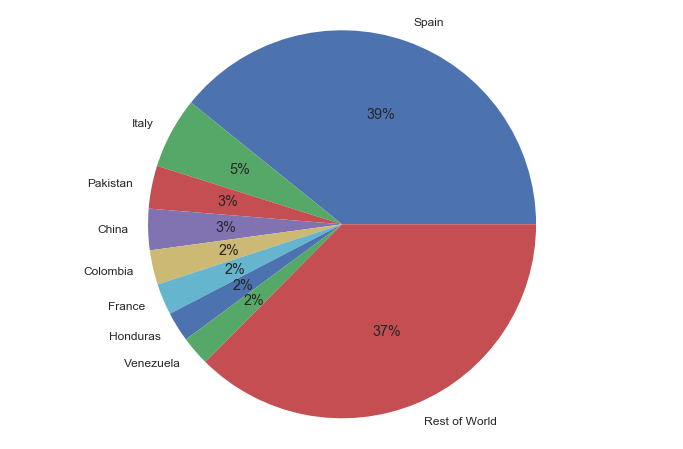

In [59]:
plt.figure(figsize=(12,8))
plt.pie(immigration_numbers[:8] + [sum_of_rest],labels=origin_countries[:8] + ["Rest of World"],autopct="%1d%%")
plt.axis("equal")

### Absolute Number of Immigrants by Origin

Text(0,0.5,'Number of Immigrants')

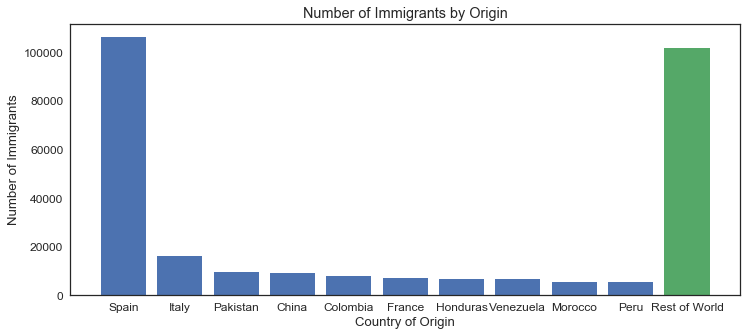

In [60]:
plt.figure(figsize=(12,5))
plt.bar(origin_countries[:10],immigration_numbers[:10])
plt.bar(["Rest of World"],[sum_of_rest])
plt.title("Number of Immigrants by Origin")
plt.xlabel("Country of Origin")
plt.ylabel("Number of Immigrants")

### Comparison of Immigration Numbers of three Years

In [61]:
immigration_numbers_by_year = {year:[sum(immigrants[immigrants["Nationality"]==country][immigrants["Year"]==year]["Number"]) for country in origin_countries] for year in unique_years}

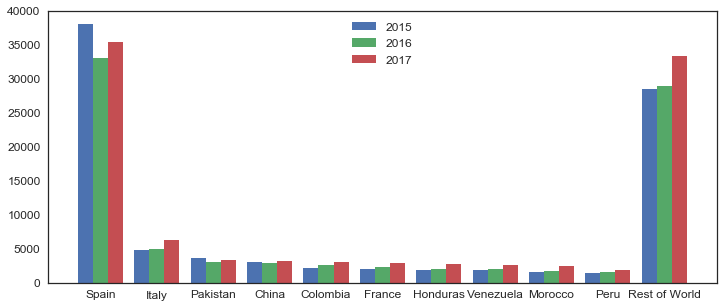

In [62]:
plt.figure(figsize=(12,5))
t = len(immigration_numbers_by_year.keys())
d = len(immigration_numbers)
w = 0.8
for n,year in enumerate(immigration_numbers_by_year.keys()):
    x_values = [t*element + w*n for element in range(d)]
    current_immigration_numbers = immigration_numbers_by_year[year]
    current_immigration_numbers.sort(reverse=True)
    plt.bar(x_values[:11], current_immigration_numbers[:10] + [sum(current_immigration_numbers[10:])])
ax = plt.subplot()
ax.set_xticks([0.8 + 3*n for n in range(11)])

ax.set_xticklabels(origin_countries[0:10] + ["Rest of World"])
plt.legend(immigration_numbers_by_year.keys())

### Development of Immigration over three years for each district

In [63]:
unique_districts = set(immigrants["District Name"])

Text(0.5,0.98,'Development of Immigration over Time')

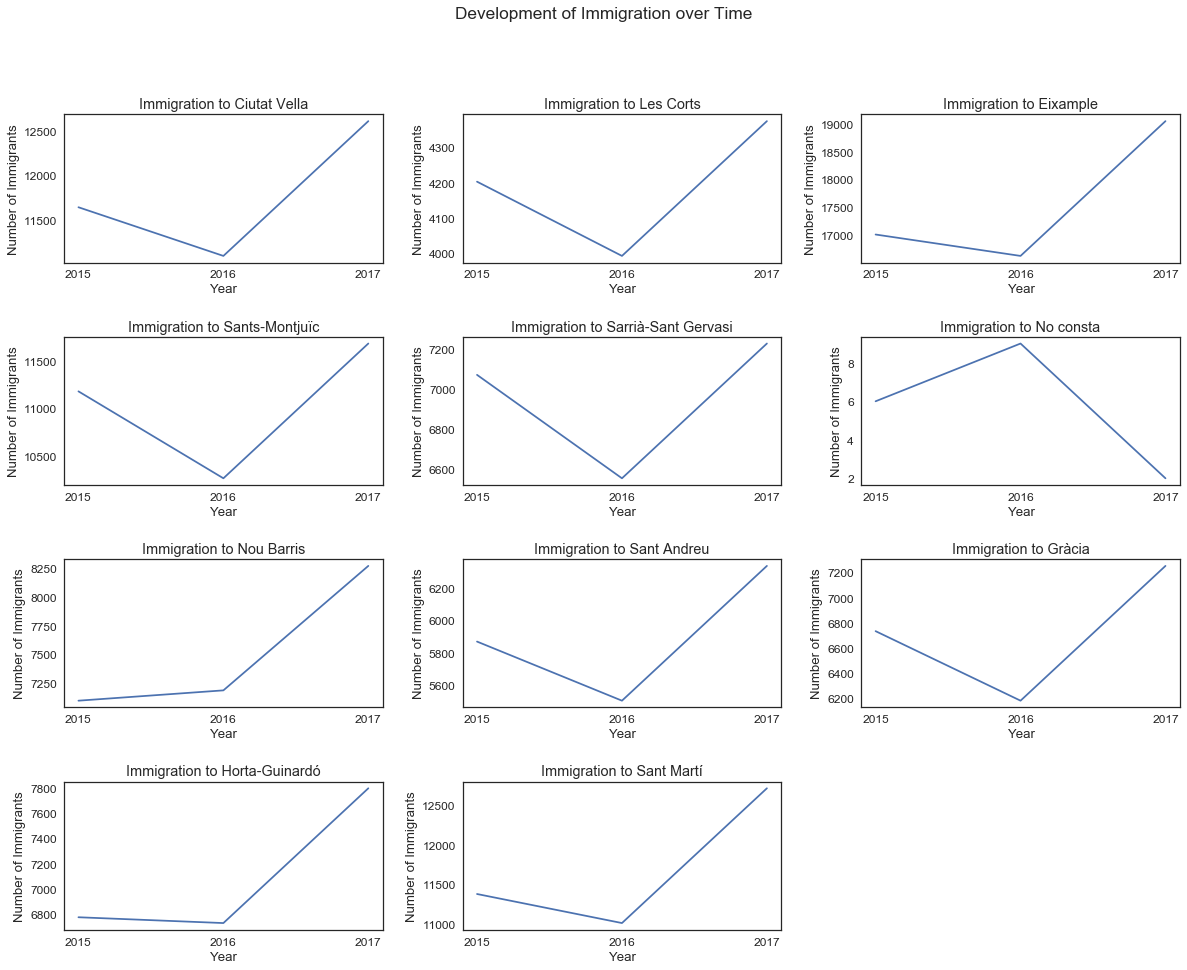

In [65]:
plt.figure(figsize=(20,15))
for ind,district in enumerate(unique_districts):
    ax = plt.subplot(4,3,ind+1)
    curr_immigrants = immigrants[immigrants["District Name"] == district]
    plt.plot(unique_years,[sum(curr_immigrants[curr_immigrants["Year"] == year].Number) for year in unique_years])
    plt.title("Immigration to " + district)
    plt.ylabel("Number of Immigrants")
    plt.xlabel("Year")
    ax.set_xticks(unique_years)
plt.subplots_adjust(wspace=0.25,hspace=0.5) 
plt.suptitle("Development of Immigration over Time",)

## Analysis of Emigration

In [66]:
emigration = pd.read_csv("input/immigrants_emigrants_by_age.csv")

In [67]:
emigration.head()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Age,Immigrants,Emigrants
0,2017,1,Ciutat Vella,1,el Raval,0-4,154,108
1,2017,1,Ciutat Vella,2,el Barri Gòtic,0-4,58,33
2,2017,1,Ciutat Vella,3,la Barceloneta,0-4,38,37
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",0-4,56,55
4,2017,2,Eixample,5,el Fort Pienc,0-4,79,60


In [68]:
emigration[emigration==">=95"].Age = ">=90"
emigration[emigration=="90-94"].Age = ">=90"

### Distribution of age among emigrants

In [69]:
age_ordered_missing_last = age_ordered[:-1]

(-1.107132044488465,
 1.1003396220249042,
 -1.1018264196664371,
 1.108110147062644)

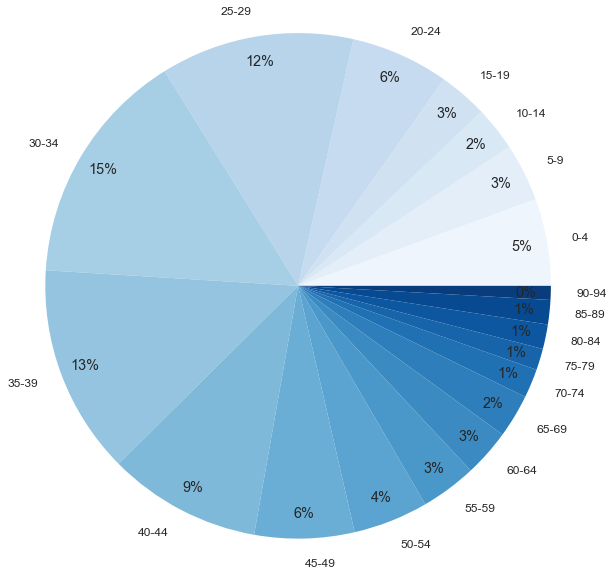

In [70]:
sns.set_palette("Blues", len(age_ordered_missing_last))
plt.figure(figsize=(10,10))
plt.pie([sum(emigration[emigration.Age == age].Emigrants) for age in age_ordered_missing_last],autopct="%1d%%",labels=age_ordered_missing_last,pctdistance=0.9)
plt.axis("equal")

#### Distribution of immigrants among age groups for each group consisting of more than 5000 people

(-1.120264725241779,
 1.1009649880472134,
 -1.1057466240265463,
 1.1125901398300522)

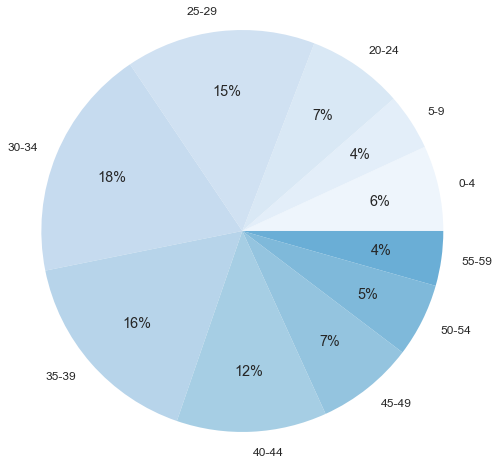

In [71]:
plt.figure(figsize=(8,8))
plt.pie([sum(emigration[emigration.Age == age].Emigrants) for age in age_ordered if sum(emigration[emigration.Age == age].Emigrants) > 5000],autopct="%1d%%",labels=[age for age in age_ordered if sum(emigration[emigration.Age == age].Emigrants) > 5000],pctdistance=0.7)
plt.axis("equal")

In [72]:
imigration_emigration_destination = pd.read_csv("input/immigrants_emigrants_by_destination.csv")

In [73]:
imigration_emigration_destination.head()

,from,to,weight
0,Abroad,Barcelona,53085
1,Andalusia,Barcelona,2416
2,Aragon,Barcelona,811
3,Asturias,Barcelona,323
4,Balearic Islands,Barcelona,1634


In [74]:
total_imigration = sum(imigration_emigration_destination[imigration_emigration_destination.to=="Barcelona"].weight)
total_emigration = sum(imigration_emigration_destination[imigration_emigration_destination.to!="Barcelona"].weight)

In [75]:
total_imigration

97325

In [76]:
total_emigration

52648

In [77]:
## set plotly credentials before calling graph function

In [78]:
import plotly.plotly as py

In [79]:
origins = list(set(imigration_emigration_destination["from"]))
origins_without_BCN = [o for o in origins]

In [80]:
origins_without_BCN.remove("Barcelona")

In [81]:
src = [ind for ind,origin in enumerate(origins_without_BCN)]
val_out = [imigration_emigration_destination[imigration_emigration_destination["from"]==origin]["weight"].values[0] for origin in origins_without_BCN]
val_in = [imigration_emigration_destination[imigration_emigration_destination["to"]==origin]["weight"].values[0] for origin in origins_without_BCN]

### Flow of immigrants by origin

In [83]:
fig = dict(
    data = [dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = origins_without_BCN + ["Barcelona"],
          color = ["blue" for x in origins]
        ),
        link = dict(
          source = src,
          target = [len(origins)-1 for o in src],
          value = val_out
      ))],
    layout =  dict(
        title = "Visualisation of Migration Streams",
        font = dict(
          size = 10
        )
    )
)

In [84]:
py.iplot(fig, validate=False,)

In [85]:
fig = dict(
    data = [dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = origins_without_BCN + ["Barcelona"],
          color = ["blue" for x in origins]
        ),
        link = dict(
          source = [len(origins)-1 for o in src],
          target = src,
          value = val_in
      ))],
    layout =  dict(
        title = "Visualisation of Migration Streams",
        font = dict(
          size = 10
        )
    )
)

In [86]:
py.iplot(fig, validate=False,)

In [87]:
fig = dict(
    data = [dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = origins_without_BCN + ["Barcelona"] + origins_without_BCN + ["Barcelona"],
          color = ["blue" for x in origins] + ["red" for x in origins]
        ),
        link = dict(
          source = [len(origins)-1 for o in src] + [s + len(origins) for s in src],
          target = src + [2 * len(origins)-1 for o in src],
          value = val_in + val_out
      ))],
    layout =  dict(
        title = "Visualisation of Migration Streams",
        font = dict(
          size = 10
        )
    )
)

In [88]:
py.iplot(fig, validate=False,)